### 多项逻辑斯蒂回归

黄荣贵（复旦大学社会学系）

In [1]:
library(foreign)
occD <- read.dta("datasets//nomocc2.dta")

head(occD)

occ,white,ed,exper
Menial,1,11,3
Menial,1,12,14
Menial,1,12,44
Menial,1,12,18
Menial,0,14,24
Menial,1,13,38


#### 使用nnet程序包

In [2]:
## use nnet package
library(nnet)
m <- multinom(occ ~ white + ed + exper, data = occD)
summary(m, Wald=TRUE)

# weights:  25 (16 variable)
initial  value 542.380576 
iter  10 value 472.154249
iter  20 value 426.809681
final  value 426.800478 
converged


Call:
multinom(formula = occ ~ white + ed + exper, data = occD)

Coefficients:
         (Intercept)    white          ed       exper
BlueCol    0.7412827 1.236558 -0.09943147 0.004719346
Craft     -1.0910811 0.472306  0.09379499 0.027682191
WhiteCol  -6.2384895 1.571375  0.35314716 0.034594267
Prof     -11.5181636 1.774363  0.77883489 0.035648251

Std. Errors:
         (Intercept)     white         ed      exper
BlueCol     1.519529 0.7244381 0.10227986 0.01739809
Craft       1.450197 0.6042998 0.09755328 0.01667341
WhiteCol    1.899080 0.9027137 0.11727718 0.01882913
Prof        1.849340 0.7550515 0.11462750 0.01803671

Value/SE (Wald statistics):
         (Intercept)     white         ed     exper
BlueCol    0.4878370 1.7069200 -0.9721511 0.2712565
Craft     -0.7523678 0.7815757  0.9614745 1.6602599
WhiteCol  -3.2850055 1.7407236  3.0112179 1.8372742
Prof      -6.2282575 2.3499897  6.7944853 1.9764280

Residual Deviance: 853.601 
AIC: 885.601 

#### 使用VGAM程序包

In [3]:
library(VGAM)
mlogit_mod <- vglm(occ ~ white + ed + exper, family=multinomial, data = occD)
summary(mlogit_mod)

Loading required package: stats4
Loading required package: splines



Call:
vglm(formula = occ ~ white + ed + exper, family = multinomial, 
    data = occD)


Pearson residuals:
                      Min      1Q  Median       3Q   Max
log(mu[,1]/mu[,5]) -6.101 -0.2636 -0.2055 -0.10910 6.221
log(mu[,2]/mu[,5]) -6.848 -0.4473 -0.2719 -0.06829 4.976
log(mu[,3]/mu[,5]) -6.663 -0.4976 -0.3694 -0.06182 2.912
log(mu[,4]/mu[,5]) -5.657 -0.3991 -0.2312 -0.18398 3.800

Coefficients: 
               Estimate Std. Error z value Pr(>|z|)    
(Intercept):1 11.518331   1.849347   6.228 4.71e-10 ***
(Intercept):2 12.259564   1.668134   7.349 1.99e-13 ***
(Intercept):3 10.426978   1.517933   6.869 6.46e-12 ***
(Intercept):4  5.279722   1.683988   3.135  0.00172 ** 
white:1       -1.774306   0.755052  -2.350  0.01878 *  
white:2       -0.537803   0.799601  -0.673  0.50121    
white:3       -1.301963   0.647414  -2.011  0.04432 *  
white:4       -0.202921   0.869302  -0.233  0.81543    
ed:1          -0.778852   0.114629  -6.795 1.09e-11 ***
ed:2          -0.878277   0.10

In [4]:
predProb = predict(mlogit_mod, type="response")
head(predProb)

,Menial,BlueCol,Craft,WhiteCol,Prof
1,0.16812947,0.41280019,0.2760953,0.08528796,0.05768713
2,0.12578155,0.29450178,0.3076293,0.13289479,0.13919256
3,0.06444563,0.17385084,0.3616529,0.19223310,0.20781752
4,0.11617443,0.27719357,0.3174044,0.14096156,0.14826600
5,0.16913829,0.09882141,0.4104240,0.10633733,0.21527896
6,0.05643905,0.13399265,0.2946349,0.19473324,0.32020018


In [5]:
mf = model.frame(mlogit_mod)
head(mf)

occ,white,ed,exper
Menial,1,11,3
Menial,1,12,14
Menial,1,12,44
Menial,1,12,18
Menial,0,14,24
Menial,1,13,38


In [6]:
summary(mf)

       occ          white              ed            exper     
 Menial  : 31   Min.   :0.0000   Min.   : 3.00   Min.   : 2.0  
 BlueCol : 69   1st Qu.:1.0000   1st Qu.:12.00   1st Qu.: 9.0  
 Craft   : 84   Median :1.0000   Median :12.00   Median :17.0  
 WhiteCol: 41   Mean   :0.9169   Mean   :13.09   Mean   :20.5  
 Prof    :112   3rd Qu.:1.0000   3rd Qu.:15.00   3rd Qu.:31.0  
                Max.   :1.0000   Max.   :20.00   Max.   :66.0  

In [7]:
summary(occD)

       occ          white              ed            exper     
 Menial  : 31   Min.   :0.0000   Min.   : 3.00   Min.   : 2.0  
 BlueCol : 69   1st Qu.:1.0000   1st Qu.:12.00   1st Qu.: 9.0  
 Craft   : 84   Median :1.0000   Median :12.00   Median :17.0  
 WhiteCol: 41   Mean   :0.9169   Mean   :13.09   Mean   :20.5  
 Prof    :112   3rd Qu.:1.0000   3rd Qu.:15.00   3rd Qu.:31.0  
                Max.   :1.0000   Max.   :20.00   Max.   :66.0  

In [8]:
newData= data.frame(white=0.917, ed=3:20, exper=20.5)
head(newData, 10)

white,ed,exper
0.917,3,20.5
0.917,4,20.5
0.917,5,20.5
0.917,6,20.5
0.917,7,20.5
0.917,8,20.5
0.917,9,20.5
0.917,10,20.5
0.917,11,20.5
0.917,12,20.5


In [9]:
predProb = predict(mlogit_mod, newData, type="response")
head(predProb, 3)

,Menial,BlueCol,Craft,WhiteCol,Prof
1,0.1317343,0.7023318,0.1594192,0.006371450,0.0001432584
2,0.1383651,0.6678676,0.1839128,0.009526653,0.0003278678
3,0.1442351,0.6303115,0.2105716,0.014137064,0.0007447222


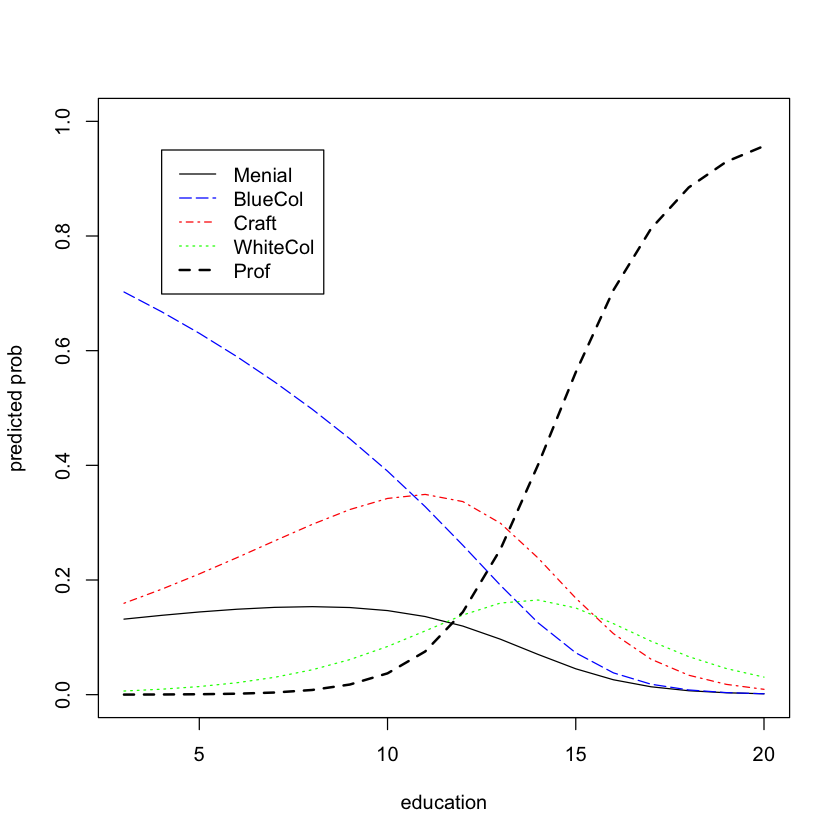

In [10]:
plot(x=3:20, y=predProb[,1], type="l", ylim=c(0,1) , ylab="predicted prob", xlab="education")
lines(x=3:20, y=predProb[,2], col="blue", lty=5)
lines(x=3:20, y=predProb[,3], col="red", lty=4)
lines(x=3:20, y=predProb[,4], col="green", lty=3)
lines(x=3:20, y=predProb[,5], lty=2, lwd=2)

legend(x=4, y=0.95, legend=c('Menial', 'BlueCol', 'Craft', 'WhiteCol','Prof'), 
       col=c("black", "blue", "red", "green", "black"), lty=c(1, 5, 4, 3, 2), lwd=c(1, 1, 1, 1, 2))

关于图例的制作，参见 help(legend)

#### 使用mlogit程序包

In [11]:
## use mlogit package as well
library(mlogit)
occ_long <- mlogit.data(occD, choice="occ", shape="wide")
head(occ_long)

Loading required package: Formula
Loading required package: maxLik
Loading required package: miscTools

Please cite the 'maxLik' package as:
Henningsen, Arne and Toomet, Ott (2011). maxLik: A package for maximum likelihood estimation in R. Computational Statistics 26(3), 443-458. DOI 10.1007/s00180-010-0217-1.

If you have questions, suggestions, or comments regarding the 'maxLik' package, please use a forum or 'tracker' at maxLik's R-Forge site:
https://r-forge.r-project.org/projects/maxlik/

Attaching package: ‘mlogit’

The following object is masked from ‘package:VGAM’:

    lrtest



,occ,white,ed,exper,chid,alt
1.BlueCol,FALSE,1,11,3,1,BlueCol
1.Craft,FALSE,1,11,3,1,Craft
1.Menial,TRUE,1,11,3,1,Menial
1.Prof,FALSE,1,11,3,1,Prof
1.WhiteCol,FALSE,1,11,3,1,WhiteCol
2.BlueCol,FALSE,1,12,14,2,BlueCol


In [12]:
## two new variables are created (chid and alt)
m1 <- mlogit(occ~0|white+ed+exper, data=occ_long)
summary(m1)


Call:
mlogit(formula = occ ~ 0 | white + ed + exper, data = occ_long, 
    method = "nr", print.level = 0)

Frequencies of alternatives:
 BlueCol    Craft   Menial     Prof WhiteCol 
0.204748 0.249258 0.091988 0.332344 0.121662 

nr method
5 iterations, 0h:0m:0s 
g'(-H)^-1g = 3.46E-08 
gradient close to zero 

Coefficients :
                        Estimate  Std. Error t-value  Pr(>|t|)    
Craft:(intercept)     -1.8325864   1.1861143 -1.5450   0.12234    
Menial:(intercept)    -0.7412336   1.5195399 -0.4878   0.62569    
Prof:(intercept)     -12.2595643   1.6681445 -7.3492 1.994e-13 ***
WhiteCol:(intercept)  -6.9798418   1.7143948 -4.0713 4.675e-05 ***
Craft:white           -0.7641602   0.6324189 -1.2083   0.22693    
Menial:white          -1.2365038   0.7244352 -1.7069   0.08785 .  
Prof:white             0.5378027   0.7996033  0.6726   0.50121    
WhiteCol:white         0.3348815   0.9340055  0.3585   0.71994    
Craft:ed               0.1932401   0.0774975  2.4935   0.01265 *  
Me

In [13]:
## change the baseline
m2 <- mlogit(occ~0 | white+ed+exper, data=occ_long, reflevel="Prof")
summary(m2)


Call:
mlogit(formula = occ ~ 0 | white + ed + exper, data = occ_long, 
    reflevel = "Prof", method = "nr", print.level = 0)

Frequencies of alternatives:
    Prof  BlueCol    Craft   Menial WhiteCol 
0.332344 0.204748 0.249258 0.091988 0.121662 

nr method
5 iterations, 0h:0m:0s 
g'(-H)^-1g = 3.46E-08 
gradient close to zero 

Coefficients :
                       Estimate Std. Error t-value  Pr(>|t|)    
BlueCol:(intercept)  12.2595643  1.6681445  7.3492 1.994e-13 ***
Craft:(intercept)    10.4269779  1.5179434  6.8691 6.459e-12 ***
Menial:(intercept)   11.5183308  1.8493561  6.2283 4.715e-10 ***
WhiteCol:(intercept)  5.2797225  1.6840058  3.1352  0.001717 ** 
BlueCol:white        -0.5378027  0.7996033 -0.6726  0.501210    
Craft:white          -1.3019629  0.6474160 -2.0110  0.044324 *  
Menial:white         -1.7743065  0.7550543 -2.3499  0.018778 *  
WhiteCol:white       -0.2029212  0.8693072 -0.2334  0.815429    
BlueCol:ed           -0.8782767  0.1005446 -8.7352 < 2.2e-16 ***
Cra

### 统计检验

In [14]:
waldtest(m2, .~.|.-white)

Res.Df,Df,Chisq,Pr(>Chisq)
321,NA,NA,NA
325,-4,8.149203,0.08626308


In [15]:
waldtest(m2,.~.|.-ed)

Res.Df,Df,Chisq,Pr(>Chisq)
321,NA,NA,NA
325,-4,84.96817,1.540732e-17


In [16]:
waldtest(m2,.~.|.-exper)

Res.Df,Df,Chisq,Pr(>Chisq)
321,NA,NA,NA
325,-4,7.994939,0.09176376


In [17]:
waldtest(m2,.~.|.-white -ed)

Res.Df,Df,Chisq,Pr(>Chisq)
321,NA,NA,NA
329,-8,88.73308,8.405312e-16


In [18]:
lrtest(m2,.~.|.-white)

#Df,LogLik,Df,Chisq,Pr(>Chisq)
16,-426.8005,NA,NA,NA
12,-430.8482,-4,8.095408,0.08814514


In [19]:
lrtest(m2,.~.|.-ed)

#Df,LogLik,Df,Chisq,Pr(>Chisq)
16,-426.8005,NA,NA,NA
12,-505.2691,-4,156.9372,6.633083e-33


In [20]:
lrtest(m2, .~.|.-exper)

#Df,LogLik,Df,Chisq,Pr(>Chisq)
16,-426.8005,NA,NA,NA
12,-431.0810,-4,8.560953,0.07306102


In [21]:
## constrained models must be fitted for score test
m2cwhite <- update(m2, .~.|.-white)
m2cexper <- update(m2,.~.|.-exper)
m2ced <- update(m2,.~.|.-ed)

In [22]:
## the first argument must be the constrained model
scoretest(m2cwhite, m2)


	score test

data:  occ ~ 1 - 1 | white + ed + exper
chisq = 8.8204, df = 4, p-value = 0.06575
alternative hypothesis: unconstrained model


In [23]:
scoretest(m2ced, m2)


	score test

data:  occ ~ 1 - 1 | white + ed + exper
chisq = 124.55, df = 4, p-value < 2.2e-16
alternative hypothesis: unconstrained model


In [24]:
scoretest(m2cexper,m2)


	score test

data:  occ ~ 1 - 1 | white + ed + exper
chisq = 8.2114, df = 4, p-value = 0.08413
alternative hypothesis: unconstrained model


In [25]:
## IIA test: Hausman-style test
m3 <- update(m2, alt.subset=c("BlueCol", "Craft", "WhiteCol", "Prof"))
## Menial is excluded
hmftest(m2,m3)


	Hausman-McFadden test

data:  occ_long
chisq = 7.3258, df = 12, p-value = 0.8354
alternative hypothesis: IIA is rejected


In [26]:
m3 <- update(m2, alt.subset=c("BlueCol","Menial","WhiteCol","Prof"))
## Craft is excluded
hmftest(m2,m3) ## negative -> IIA holds


	Hausman-McFadden test

data:  occ_long
chisq = -14.438, df = 12, p-value = 1
alternative hypothesis: IIA is rejected


In [27]:
?hmftest